In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly as px
from imblearn.over_sampling import SMOTE



from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score


from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import accuracy_score

import os


import lime
import lime.lime_tabular

from sklearn.metrics import classification_report,confusion_matrix,f1_score
import warnings
warnings.filterwarnings('ignore')




In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

# Exploratory Data Analysis

<AxesSubplot:xlabel='gender', ylabel='count'>

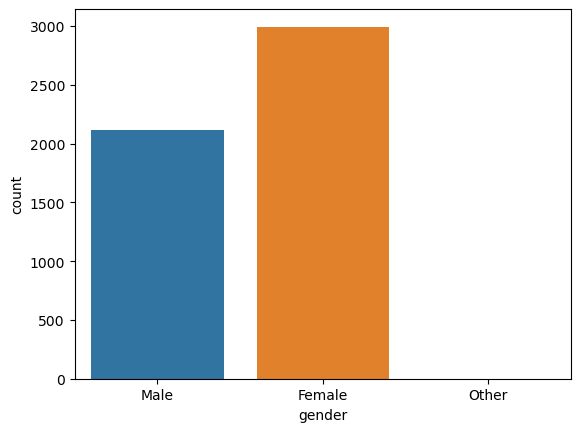

In [4]:
sns.countplot(data = df, x= 'gender')

<AxesSubplot:xlabel='hypertension', ylabel='count'>

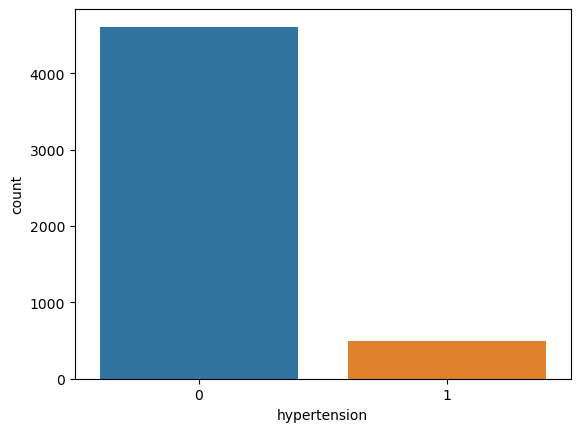

In [5]:
sns.countplot(data = df, x= 'hypertension')

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

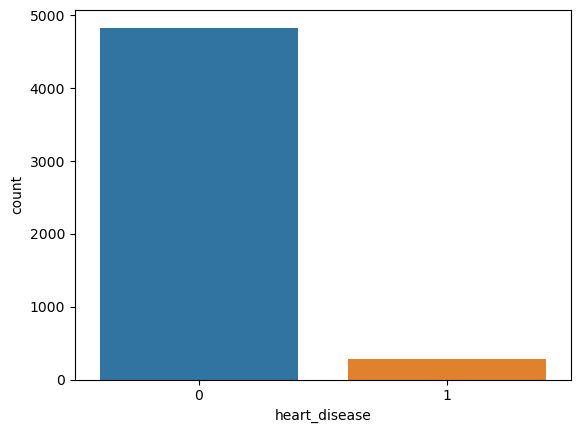

In [6]:
sns.countplot(data = df, x= 'heart_disease')

<AxesSubplot:xlabel='ever_married', ylabel='count'>

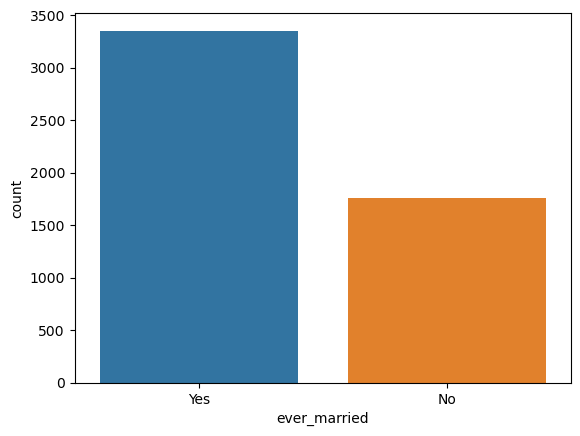

In [7]:
sns.countplot(data = df, x= 'ever_married')

<AxesSubplot:xlabel='work_type', ylabel='count'>

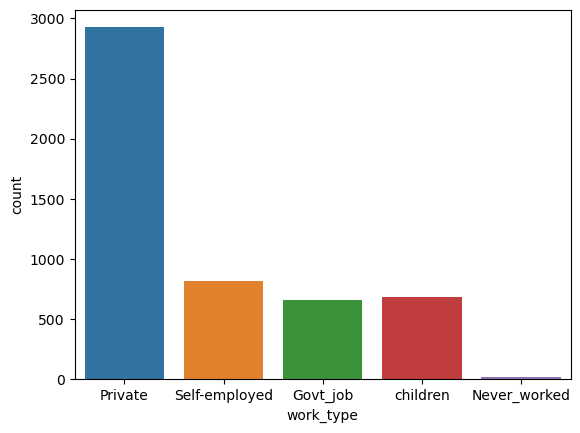

In [8]:
sns.countplot(data = df, x= 'work_type')

In [9]:
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

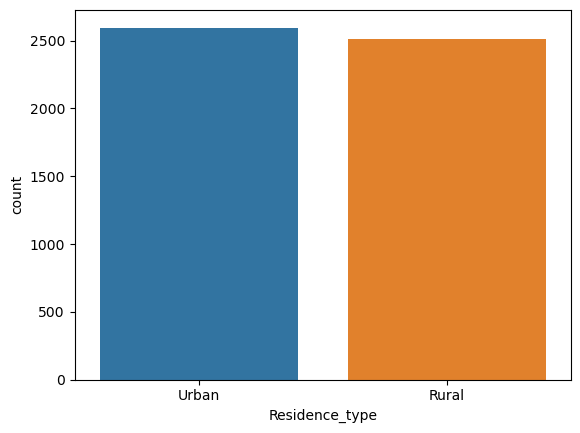

In [10]:
sns.countplot(data = df, x= 'Residence_type')

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

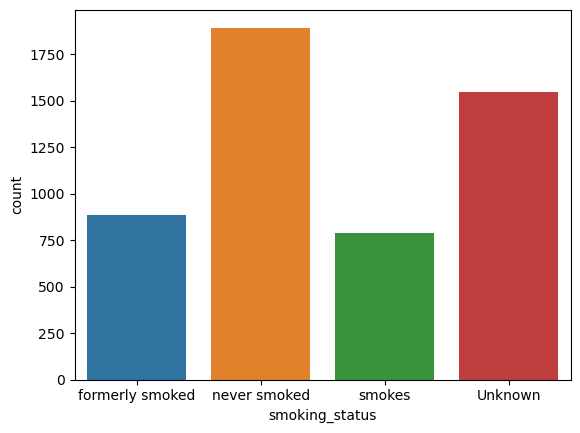

In [11]:
sns.countplot(data = df, x= 'smoking_status')

<AxesSubplot:xlabel='age', ylabel='Density'>

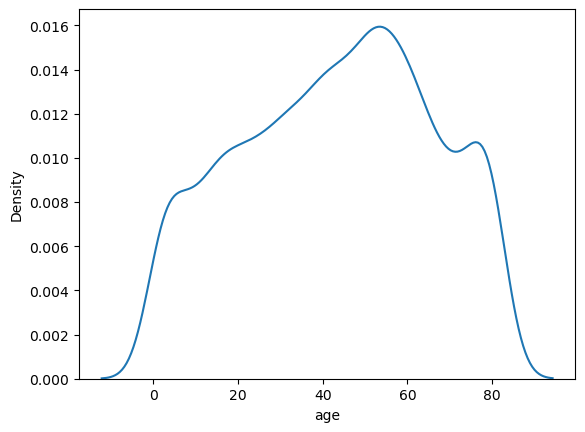

In [12]:
sns.kdeplot(df['age'])

<AxesSubplot:xlabel='bmi', ylabel='Density'>

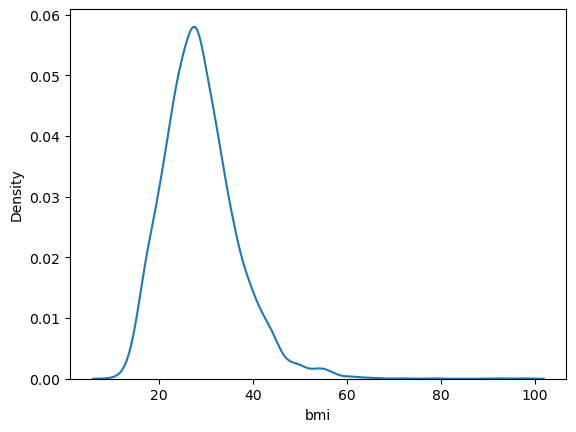

In [13]:
sns.kdeplot(df['bmi'])

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Density'>

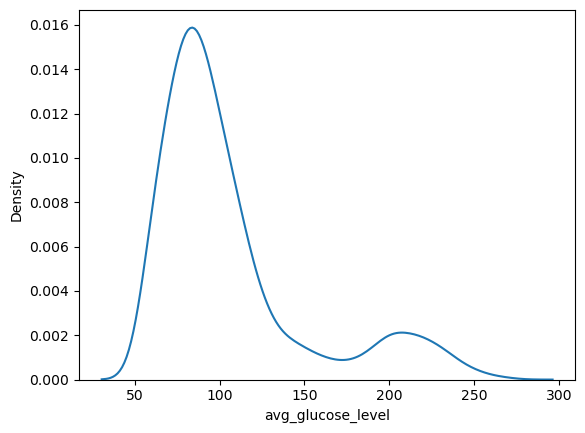

In [14]:
sns.kdeplot(df['avg_glucose_level'])

In [15]:
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

<AxesSubplot:xlabel='age', ylabel='Density'>

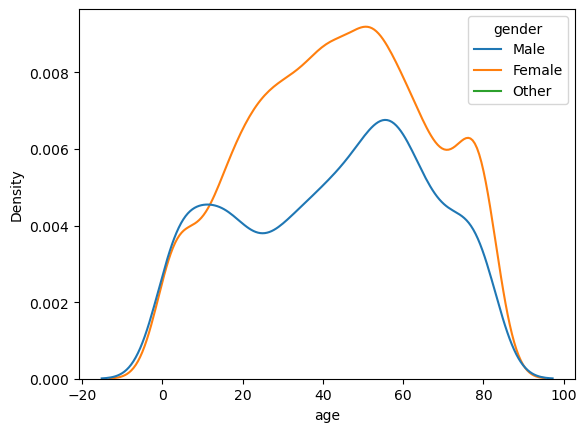

In [16]:
sns.kdeplot(x = df['age'],hue=df['gender'])

<AxesSubplot:xlabel='bmi', ylabel='Density'>

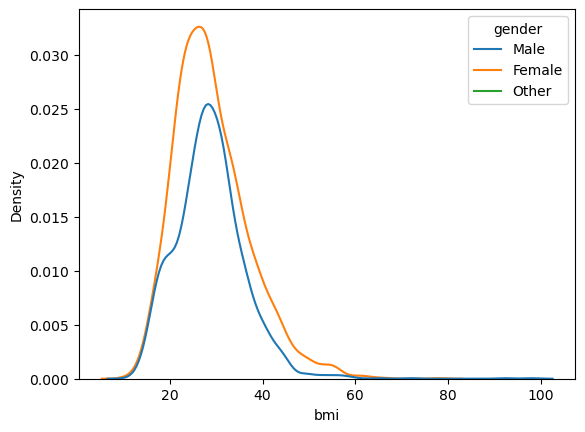

In [17]:
sns.kdeplot(x = df['bmi'],hue=df['gender'])

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Density'>

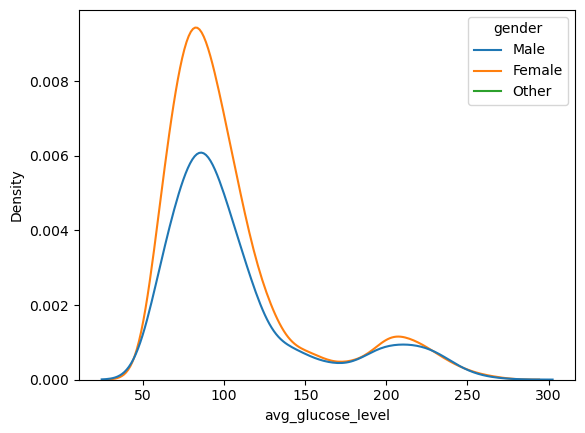

In [18]:
sns.kdeplot(x = df['avg_glucose_level'],hue=df['gender'])

<AxesSubplot:xlabel='hypertension', ylabel='count'>

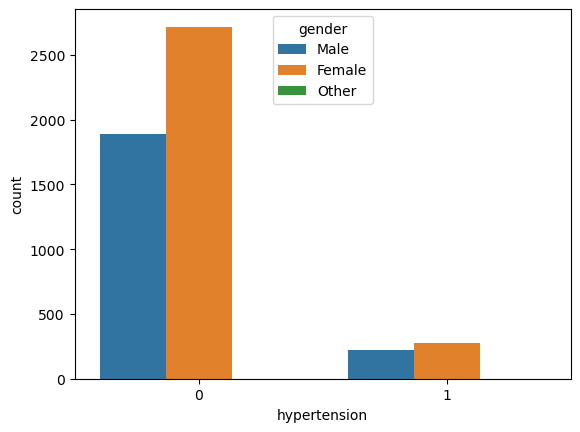

In [19]:
sns.countplot(data =df,x = 'hypertension',hue = 'gender')

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

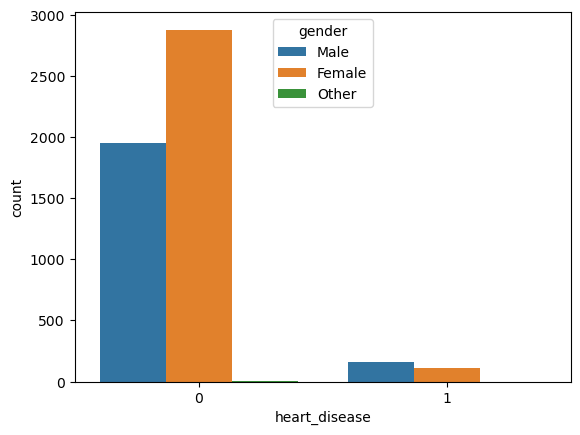

In [20]:
sns.countplot(data =df,x = 'heart_disease',hue = 'gender')

In [21]:
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

<AxesSubplot:xlabel='ever_married', ylabel='count'>

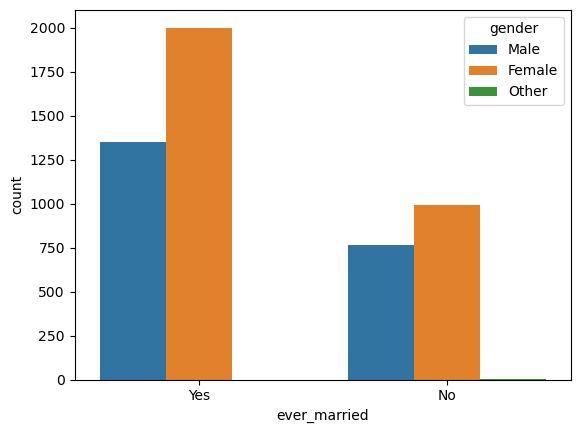

In [22]:
sns.countplot(data =df,x = 'ever_married',hue = 'gender')

<AxesSubplot:xlabel='work_type', ylabel='count'>

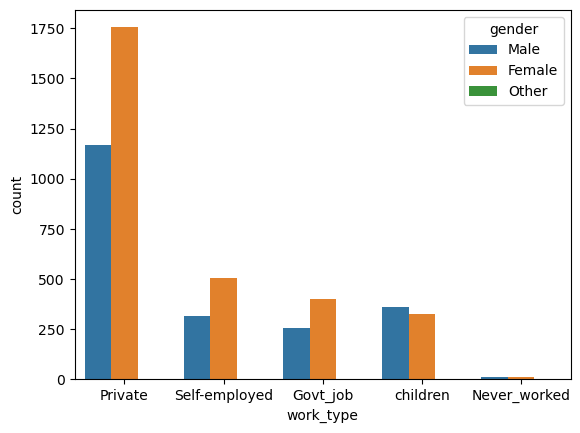

In [23]:
sns.countplot(data =df,x = 'work_type',hue = 'gender')

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

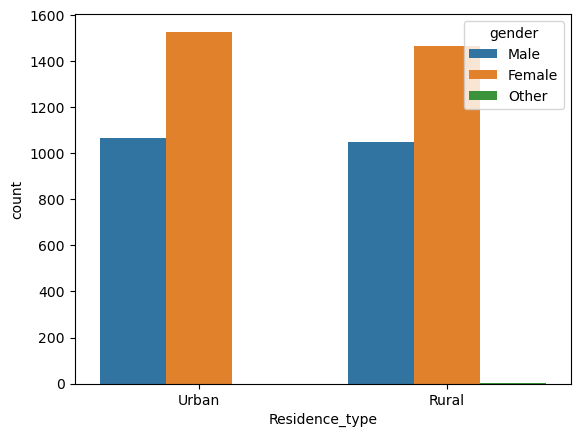

In [24]:
sns.countplot(data =df,x = 'Residence_type',hue = 'gender')

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

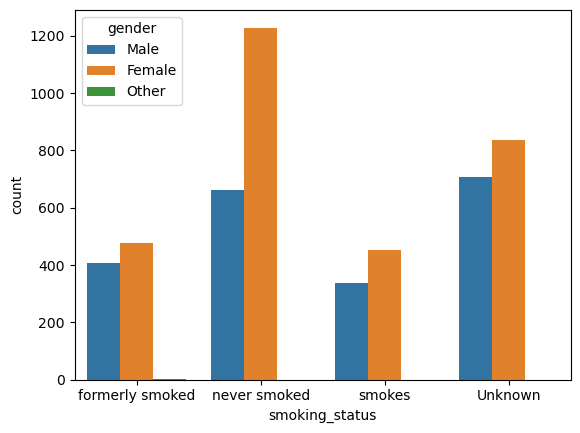

In [25]:
sns.countplot(data =df,x = 'smoking_status',hue = 'gender')

- From Here You added the charts to your ppt

<AxesSubplot:xlabel='age', ylabel='Density'>

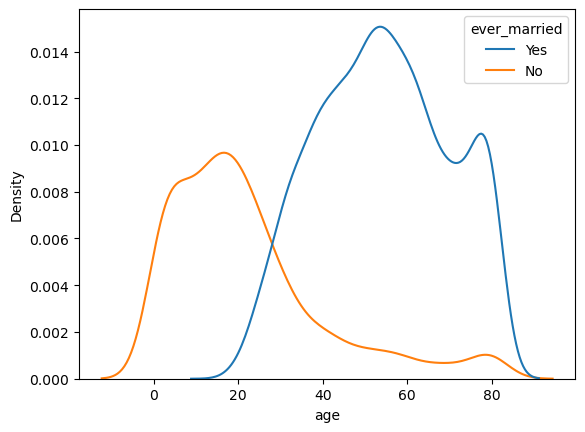

In [26]:
sns.kdeplot(data=df,x= 'age',hue='ever_married')

<AxesSubplot:xlabel='age', ylabel='Density'>

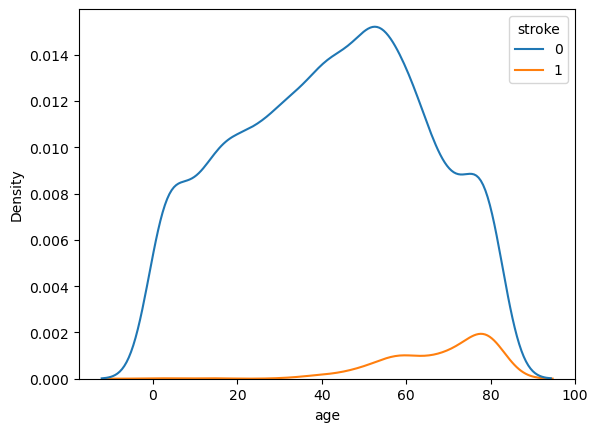

In [27]:
sns.kdeplot(data=df,x= 'age',hue='stroke')

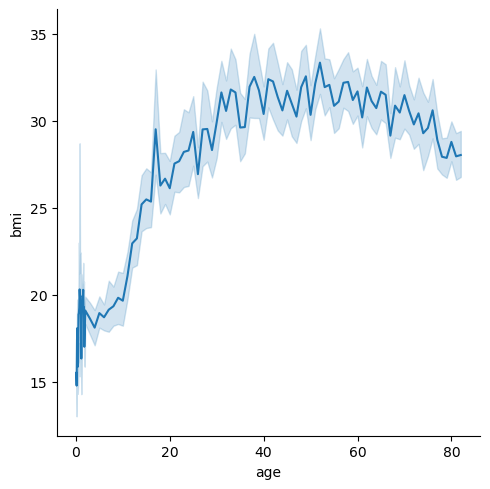

In [28]:
sns.relplot(data=df,x= 'age',y='bmi',kind='line')

<AxesSubplot:xlabel='age', ylabel='Density'>

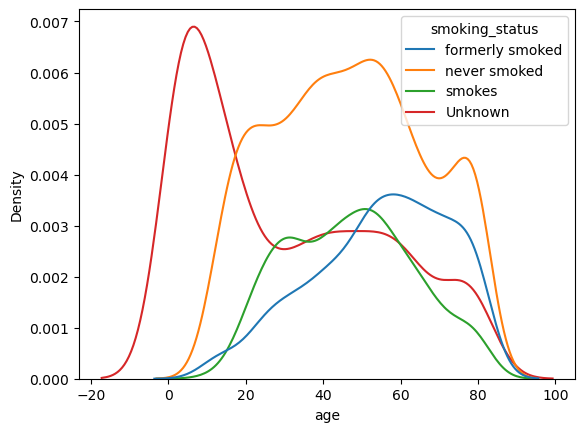

In [29]:
sns.kdeplot(data=df,x= 'age',hue='smoking_status')

<AxesSubplot:xlabel='age', ylabel='Density'>

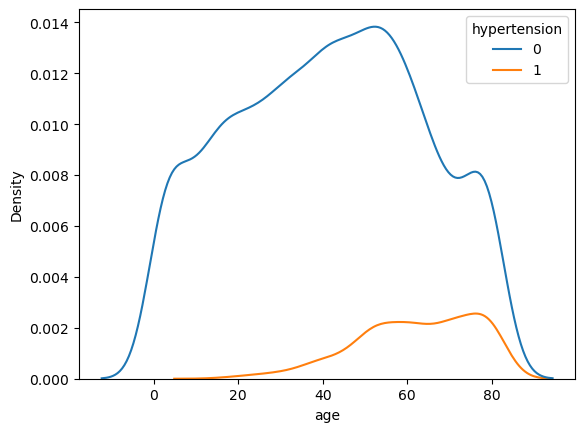

In [30]:
sns.kdeplot(data=df,x= 'age',hue='hypertension')

<AxesSubplot:xlabel='age', ylabel='Density'>

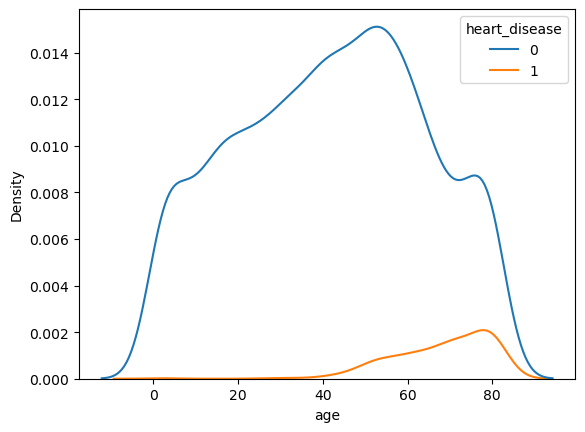

In [31]:
sns.kdeplot(data=df,x= 'age',hue='heart_disease')

<AxesSubplot:xlabel='bmi', ylabel='Density'>

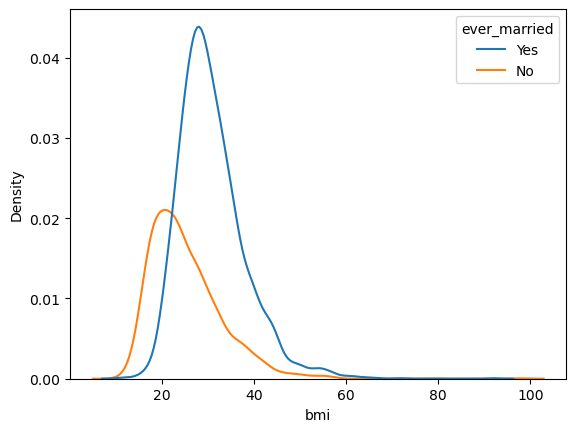

In [32]:
sns.kdeplot(data=df,x= 'bmi',hue='ever_married')

<AxesSubplot:xlabel='ever_married', ylabel='count'>

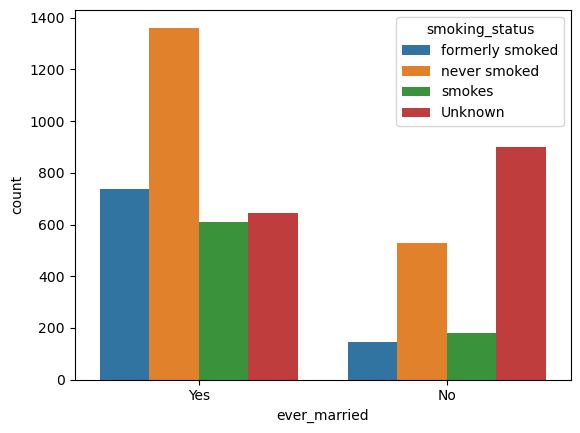

In [33]:
sns.countplot(data=df,x='ever_married',hue = 'smoking_status')

# Feature Engineering

##### Replacing a Missing values.

In [34]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [35]:
from sklearn.impute import KNNImputer

In [36]:
knn = KNNImputer()

In [37]:
df['bmi'] = knn.fit_transform(df['bmi'].values.reshape(-1,1))

In [38]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [39]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

<AxesSubplot:xlabel='stroke', ylabel='count'>

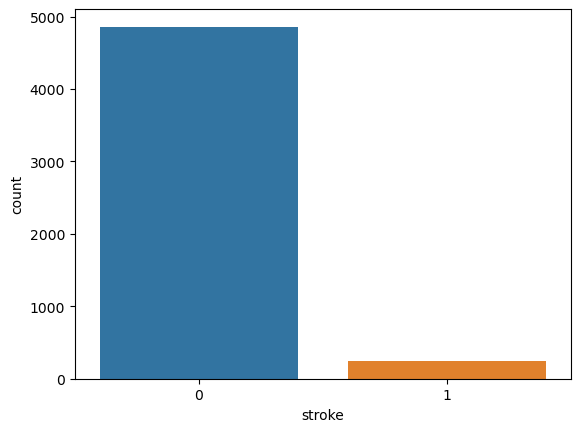

In [40]:
sns.countplot(data=df, x='stroke')


In [41]:
df.select_dtypes(include=int).columns

Index(['id', 'hypertension', 'heart_disease', 'stroke'], dtype='object')

In [42]:
for feature in list(df.select_dtypes(include=object).columns):
    print("-------------------------------------------------")
    print(f"the {feature} - >  {df[feature].value_counts()}")
    print('---------------------------------------------------')

-------------------------------------------------
the gender - >  Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
---------------------------------------------------
-------------------------------------------------
the ever_married - >  Yes    3353
No     1757
Name: ever_married, dtype: int64
---------------------------------------------------
-------------------------------------------------
the work_type - >  Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
---------------------------------------------------
-------------------------------------------------
the Residence_type - >  Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
---------------------------------------------------
-------------------------------------------------
the smoking_status - >  never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smo

In [43]:
df['stroke'].value_counts()/len(df)*100

0    95.127202
1     4.872798
Name: stroke, dtype: float64

- The ratio is 95 : 4
So training a model on this data it may leads to biased model.

In [44]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])

In [45]:
df.head()

id  gender   age  hypertension  heart_disease  ever_married  work_type  \
0   9046       1  67.0             0              1             1          2   
1  51676       0  61.0             0              0             1          3   
2  31112       1  80.0             0              1             1          2   
3  60182       0  49.0             0              0             1          2   
4   1665       0  79.0             1              0             1          3   

   Residence_type  avg_glucose_level        bmi  smoking_status  stroke  
0               1             228.69  36.600000               1       1  
1               0             202.21  28.893237               2       1  
2               0             105.92  32.500000               2       1  
3               1             171.23  34.400000               3       1  
4               0             174.12  24.000000               2       1

In [46]:
df.drop(['id'],axis=1,inplace=True)

In [47]:
for feature in list(df.select_dtypes(include=int).columns):
    print("-------------------------------------------------")
    print(f"  {df[feature].value_counts()}")
    print('---------------------------------------------------')

-------------------------------------------------
  0    2994
1    2115
2       1
Name: gender, dtype: int64
---------------------------------------------------
-------------------------------------------------
  0    4612
1     498
Name: hypertension, dtype: int64
---------------------------------------------------
-------------------------------------------------
  0    4834
1     276
Name: heart_disease, dtype: int64
---------------------------------------------------
-------------------------------------------------
  1    3353
0    1757
Name: ever_married, dtype: int64
---------------------------------------------------
-------------------------------------------------
  2    2925
3     819
4     687
0     657
1      22
Name: work_type, dtype: int64
---------------------------------------------------
-------------------------------------------------
  1    2596
0    2514
Name: Residence_type, dtype: int64
---------------------------------------------------
------------------------

In [48]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

print('X Shape', x.shape)
print('Y Shape',y.shape)

X Shape (5110, 10)
Y Shape (5110,)


#### Gender
- 0 male
- 1 female

----------------------------------------------------------

#### Heart Disease
- yes = 1
- no = 0

-----------------------------------------------------------

#### Work type
- Private = 2
- Self-employed = 3
- children = 4
- Govt_job = 0
- Never_worked =  1

-----------------------------------------------------------

#### Rural or Urban
- urban = 1
- rural = 0

-----------------------------------------------------------

##### Smoking status
- never smoked = 2
- Unknown = 0
- formerly smoked = 1
- smokes = 3

In [198]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

print('Number transations x_train df',x_train.shape)
print('Number transations x_test df',x_test.shape)
print('Number transations y_train df',y_train.shape)
print('Number transations y_test df',y_test.shape)

Number transations x_train df (4088, 10)
Number transations x_test df (1022, 10)
Number transations y_train df (4088,)
Number transations y_test df (1022,)


In [52]:
print('Before OverSampling, counts of label 1: {}'.format(sum(y_train==1)))
print('Before OverSampling, counts of label 0: {} \n'.format(sum(y_train==0)))

Before OverSampling, counts of label 1: 195
Before OverSampling, counts of label 0: 3893 



In [53]:
sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_resample(x_train,y_train.ravel())

print('After OverSampling, the shape of train_x: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {}'.format(y_train_res.shape))

print('After OverSampling, counts of label 1: {}'.format(sum(y_train_res == 1)))
print('After OverSampling, counts of label 0: {}'.format(sum(y_train_res == 0)))

After OverSampling, the shape of train_x: (7786, 10)
After OverSampling, the shape of train_y: (7786,)
After OverSampling, counts of label 1: 3893
After OverSampling, counts of label 0: 3893


In [54]:
df.corr()

gender       age  hypertension  heart_disease  \
gender             1.000000 -0.028202      0.020994       0.085447   
age               -0.028202  1.000000      0.276398       0.263796   
hypertension       0.020994  0.276398      1.000000       0.108306   
heart_disease      0.085447  0.263796      0.108306       1.000000   
ever_married      -0.031005  0.679125      0.164243       0.114644   
work_type          0.056422 -0.361642     -0.051761      -0.028023   
Residence_type    -0.006738  0.014180     -0.007913       0.003092   
avg_glucose_level  0.055180  0.238171      0.174474       0.161857   
bmi               -0.026109  0.325942      0.160189       0.038899   
smoking_status    -0.062581  0.265199      0.111038       0.048460   
stroke             0.008929  0.245257      0.127904       0.134914   

                   ever_married  work_type  Residence_type  avg_glucose_level  \
gender                -0.031005   0.056422       -0.006738           0.055180   
age                    0.679125  -0.361642        0.014180           0.238171   
hypertension           0.164243  -0.051761       -0.007913           0.174474   
heart_disease          0.114644  -0.028023        0.003092           0.161857   
ever_married           1.000000  -0.352722        0.006261           0.155068   
work_type             -0.352722   1.000000       -0.007316          -0.050513   
Residence_type         0.006261  -0.007316        1.000000          -0.004946   
avg_glucose_level      0.155068  -0.050513       -0.004946           1.000000   
bmi                    0.335705  -0.299448       -0.000120           0.168751   
smoking_status         0.259647  -0.305927        0.008237           0.063437   
stroke                 0.108340  -0.032316        0.015458           0.131945   

                        bmi  smoking_status    stroke  
gender            -0.026109       -0.062581  0.008929  
age                0.325942        0.265199  0.245257  
hypertension       0.160189        0.111038  0.127904  
heart_disease      0.038899        0.048460  0.134914  
ever_married       0.335705        0.259647  0.108340  
work_type         -0.299448       -0.305927 -0.032316  
Residence_type    -0.000120        0.008237  0.015458  
avg_glucose_level  0.168751        0.063437  0.131945  
bmi                1.000000        0.219148  0.038947  
smoking_status     0.219148        1.000000  0.028123  
stroke             0.038947        0.028123  1.000000

<AxesSubplot:>

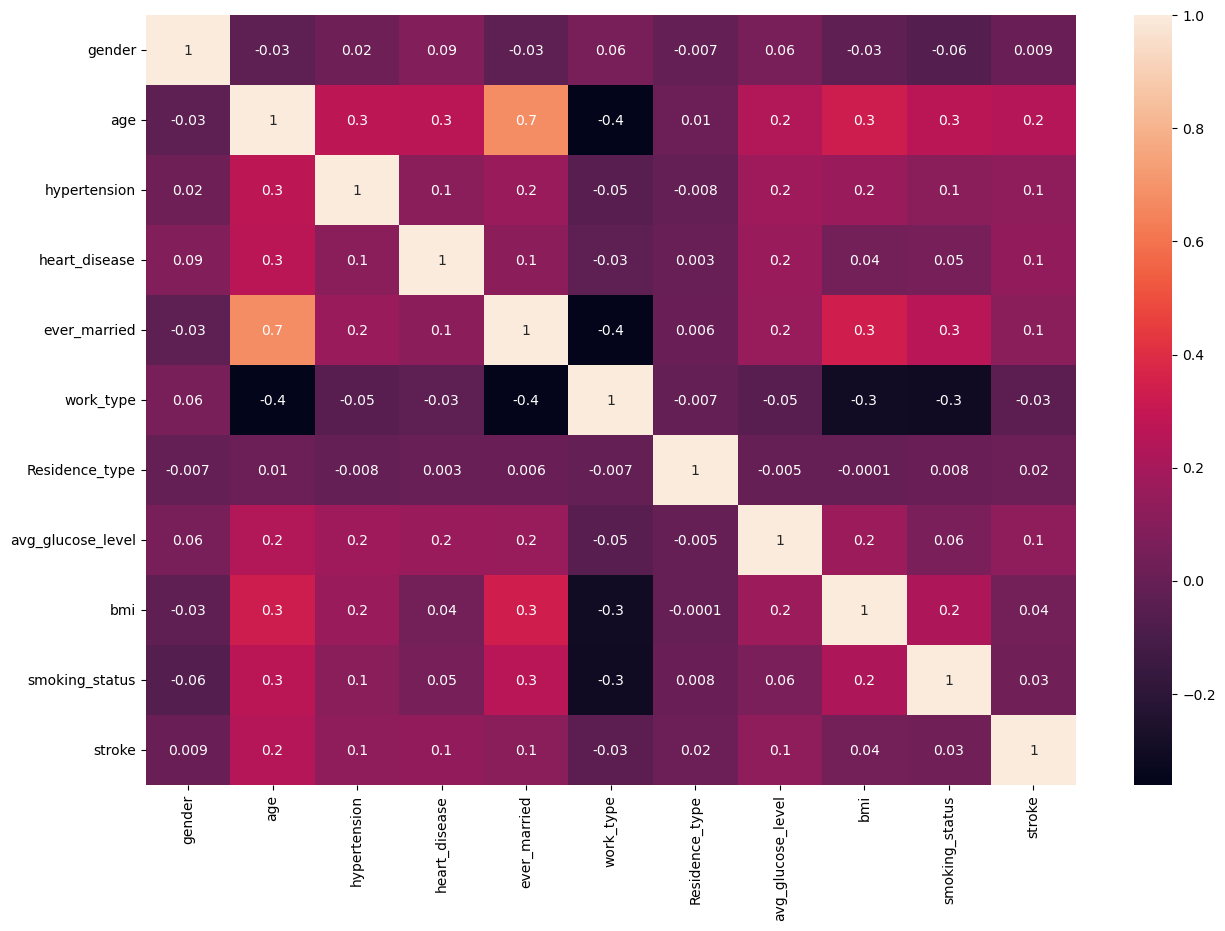

In [55]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,fmt='.1g')

# Model Creation

In [65]:
classification_models = {
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'LogisticRegression': LogisticRegression(),
    'SVM': SVC(),
    'KNeighbors': KNeighborsClassifier(),
    'NaiveBayes': GaussianNB(),
    'DecisionTree': DecisionTreeClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier()
    
}

In [156]:
df1 = pd.read_csv('healthcare-dataset-stroke-data.csv')
cat_features = df1.select_dtypes(include = 'object').columns

In [161]:
cat_features = ['hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']

In [162]:
x_train_res_df = pd.DataFrame(x_train_res, columns=df.columns[:-1])

# Concatenate x_train_res and y_train_res into a DataFrame
df_train_res = pd.concat([x_train_res_df, pd.DataFrame({'stroke': y_train_res})], axis=1)

In [163]:
df_train_res[cat_features] = df_train_res[cat_features].astype(int)

In [164]:
df_train_res

gender        age  hypertension  heart_disease  ever_married  \
0     0.000000  36.000000             0              0             1   
1     0.000000  34.000000             0              0             1   
2     1.000000  60.000000             0              0             1   
3     0.000000  75.000000             0              0             1   
4     1.000000  76.000000             0              0             1   
...        ...        ...           ...            ...           ...   
7781  0.498971  79.503088             0              0             1   
7782  1.000000  59.912603             0              0             0   
7783  1.000000  62.362895             0              0             1   
7784  0.944431  58.277846             0              0             1   
7785  0.273044  55.092174             0              0             1   

      work_type  Residence_type  avg_glucose_level        bmi  smoking_status  \
0             2               0          67.290000  36.700000               1   
1             2               0          83.530000  48.500000               1   
2             2               0          65.160000  30.800000               2   
3             3               0          78.800000  29.300000               1   
4             2               1          58.650000  25.600000               3   
...         ...             ...                ...        ...             ...   
7781          2               0          78.365690  21.645369               0   
7782          2               0          91.950589  35.729576               2   
7783          2               0         195.834618  35.530739               0   
7784          1               0         190.267883  28.893237               0   
7785          2               0         191.279374  37.258152               2   

      stroke  
0          0  
1          0  
2          0  
3          1  
4          0  
...      ...  
7781       1  
7782       1  
7783       1  
7784       1  
7785       1  

[7786 rows x 11 columns]

In [165]:
print(f'No of rows and columns in original dataset {df.shape}')
print()
print(f'No of rows and columns after SMOTE {df_train_res.shape}')
print()


No of rows and columns in original dataset (5110, 11)

No of rows and columns after SMOTE (7786, 11)



In [166]:
X = df_train_res.iloc[:,:-1]
Y = df_train_res.iloc[:,-1]

In [167]:


model_names = []
accuracies = []
oof_accuracies = []

# Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize an array to store OOF predictions for each model
oof_predictions = np.zeros((len(X), len(classification_models)))

for model_name, model in classification_models.items():
    model_names.append(model_name)
    model_accuracies[model_name] = []

    for train_index, test_index in skf.split(X, Y):
        X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
        y_train_fold, y_test_fold = Y.iloc[train_index], Y.iloc[test_index]

        model.fit(X_train_fold, y_train_fold)
        y_pred_fold = model.predict(X_test_fold)

        # Model prediction accuracy during each fold
        fold_accuracy = accuracy_score(y_test_fold, y_pred_fold)
        model_accuracies[model_name].append(fold_accuracy)

        # Out-of-Fold (OOF) prediction for the entire dataset
        oof_predictions[test_index, list(classification_models.keys()).index(model_name)] = y_pred_fold

    # Average accuracy across folds
    avg_accuracy = np.mean(model_accuracies[model_name])
    print(f'{model_name}: Average Fold Accuracy - {avg_accuracy:.4f}')

# Calculate and print the overall OOF accuracy
oof_accuracy = accuracy_score(y_train_res, oof_predictions.argmax(axis=1))
print(f'Overall OOF Accuracy: {oof_accuracy:.4f}')

RandomForest: Average Fold Accuracy - 0.9571
GradientBoosting: Average Fold Accuracy - 0.9023
LogisticRegression: Average Fold Accuracy - 0.7962
SVM: Average Fold Accuracy - 0.7860
KNeighbors: Average Fold Accuracy - 0.8889
NaiveBayes: Average Fold Accuracy - 0.7972
DecisionTree: Average Fold Accuracy - 0.9362
AdaBoost: Average Fold Accuracy - 0.8639
XGBoost: Average Fold Accuracy - 0.9612
Overall OOF Accuracy: 0.3264


In [168]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.20,random_state = 42)

In [178]:
classifier = XGBClassifier()

In [179]:
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(cm)


              precision    recall  f1-score   support

           0       0.97      0.96      0.96       777
           1       0.96      0.97      0.96       781

    accuracy                           0.96      1558
   macro avg       0.96      0.96      0.96      1558
weighted avg       0.96      0.96      0.96      1558

[[745  32]
 [ 26 755]]


In [190]:
y_pred == 0

array([False, False,  True, ..., False, False, False])

In [180]:
classifier1 = RandomForestClassifier()

In [181]:
classifier1.fit(x_train, y_train)
y_pred1 = classifier.predict(x_test)
y_prob1 = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred1)

print(classification_report(y_test, y_pred1))
print(cm)

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       777
           1       0.96      0.97      0.96       781

    accuracy                           0.96      1558
   macro avg       0.96      0.96      0.96      1558
weighted avg       0.96      0.96      0.96      1558

[[745  32]
 [ 26 755]]


# LIME MODEL INTERPRETATION

In [193]:
explainer = lime.lime_tabular.LimeTabularExplainer(x_train.values,
                                                   mode='classification',
                                                   feature_names=x_train.columns,
                                                   class_names=y_train.unique(),
                                                   discretize_continuous=True)

# Choose an instance for explanation (you can change the index)
instance_index = 0
instance = x_test.iloc[[instance_index]]

# Generate explanations for the instance
explanation = explainer.explain_instance(instance.values[0], classifier.predict_proba, num_features=len(x_train.columns))

# Display the explanation
explanation.show_in_notebook(show_table=True)

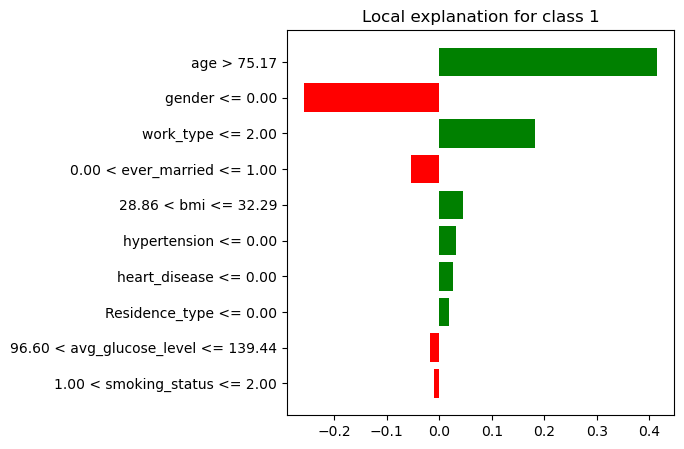

In [194]:
fig = explanation.as_pyplot_figure()

# Set the size to 5x5
fig.set_size_inches(5, 5)

# Show the plot
plt.show()

#### Gender
- 0 male
- 1 female

----------------------------------------------------------

#### Heart Disease
- yes = 1
- no = 0

-----------------------------------------------------------

#### Work type

- Govt_job = 0
- Never_worked =  1
- Private = 2
- Self-employed = 3
- children = 4

-----------------------------------------------------------

#### Rural or Urban
- urban = 1
- rural = 0

-----------------------------------------------------------

##### Smoking status

- Unknown = 0
- formerly smoked = 1
- never smoked = 2
- smokes = 3

In [195]:
explainer = lime.lime_tabular.LimeTabularExplainer(x_train.values,
                                                   mode='classification',
                                                   feature_names=x_train.columns,
                                                   class_names=y_train.unique(),
                                                   discretize_continuous=True)


instance_index = 4 
instance = x_test.iloc[[instance_index]]


explanation1 = explainer.explain_instance(instance.values[0], classifier.predict_proba, num_features=len(x_train.columns))


explanation1.show_in_notebook(show_table=True)

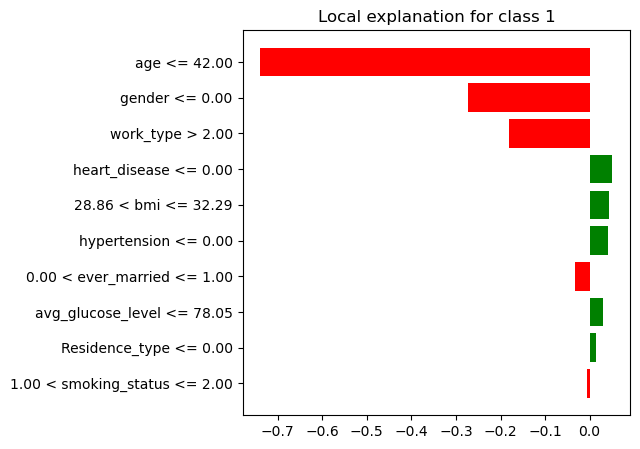

In [196]:
fig = explanation1.as_pyplot_figure()
fig.set_size_inches(5, 5)
plt.show()